# Imports

In [1]:
#Imports
%matplotlib widget
import pandas as pd
import numpy as np
import csv
import matplotlib
import matplotlib.pyplot as plt
import scipy
import datetime
import networkx as nx
import misc
import math
import random
import SmallBucket
import BigBucket
import RandomWarmUp1
import RandomWarmUp2
import StaticDynamic
import DcOrient
import time

# Data Generation

In [2]:
G = misc.createRandomGraph(size=150, density=0.3, prioritized=False)
misc.graphInfo(G)

avg = misc.getAverageDegree(G)
variance = 0
degreeTuples = list(G.degree(list(G.nodes())))

for tuple in degreeTuples:
    variance += abs(avg - tuple[1])

variance = float(variance) / G.number_of_nodes()

variance

Nodes: 85
Edges: 1194
Density: 0.334453781512605
Max Degree: 39
Average Degree: 28.094117647058823
Static Coloring uses 12 colors


3.4989619377162624

In [3]:
updates = misc.extractUpdates(G, 'shuffled')

In [4]:
Ge = nx.Graph()
Ge.add_nodes_from(list(G.nodes()))

# Algorithm Preparation

In [39]:
experimentList = []

experimentList.append([SmallBucket.SmallBucketAlgo(5, Ge), 'Small-Bucket algorithm with d = 5', 10])
experimentList.append([BigBucket.BigBucketAlgo(5, Ge), 'Big-Bucket algorithm with d = 5', 10])
experimentList.append([StaticDynamic.StaticDynamicAlgo(Ge, 50, dynamicReset=True), 'Static-Dynamic algorithm with l = 50'])
experimentList.append([RandomWarmUp1.WarmUp1Algo(Ge, maxDegreeBound=None), 'Random Warm-Up 1 without max degree'])
experimentList.append([RandomWarmUp2.WarmUp2Algo(Ge, maxDegreeBound=None), 'Random Warm-Up 2 without max degree'])
experimentList.append([DcOrient.DcOrientAlgo(Ge), 'DC-Orient'])

# Experimenting

In [40]:
print('Graph used in the experiment:')
misc.graphInfo(G)

for experiment in experimentList:

    if len(experiment) == 3:
        random.seed(experiment[2])
    else:
        random.seed()

    print("")
    print("------------------------------------------------------------------")
    print(str(experiment[1]) + ":")
    iterator = misc.UpdateIterator(experiment[0], updates)

    recolors = 0
    timer = time.perf_counter()

    while True:
        if not misc.verifyColoring(iterator.algo.G, iterator.algo.getColoring()):
            raise ValueError('The coloring produced is incorrect')
        c1 = iterator.algo.getColoring()
        if iterator.runUpdate(1):
            c2 = iterator.algo.getColoring()
            recolors += misc.numberOfRecolors(c1, c2)
        else:
            #print("all updates finished")
            break

    timer = time.perf_counter() - timer

    print("")
    print("Average number of recolors per update: " + str(float(recolors)/len(updates)))
    print("Total number of colors used at the end: " + str(misc.numberOfColors(iterator.algo.getColoring())))
    print("Time taken : " + str(timer) + " seconds")
    print("Average elementary operations : " + str(iterator.avgElemCounter))
    print("------------------------------------------------------------------")

print("End of experiment list reached")



Graph used in the experiment:
Nodes: 85
Edges: 1194
Density: 0.334453781512605
Max Degree: 39
Average Degree: 28.094117647058823
Static Coloring uses 12 colors

------------------------------------------------------------------
Small-Bucket algorithm with d = 5:

Average number of recolors per update: 3.009212730318258
Total number of colors used at the end: 35
Time taken : 0.6183426000000054 seconds
Average elementary operations : 3.0695142378559463
------------------------------------------------------------------

------------------------------------------------------------------
Big-Bucket algorithm with d = 5:

Average number of recolors per update: 3.4212730318257956
Total number of colors used at the end: 27
Time taken : 0.6060606999999436 seconds
Average elementary operations : 4.397822445561139
------------------------------------------------------------------

------------------------------------------------------------------
Static-Dynamic algorithm with l = 50:

Average num

In [29]:
random.seed(10)
print(bool(random.getrandbits(1)))
print(bool(random.getrandbits(1)))
print(bool(random.getrandbits(1)))
print(bool(random.getrandbits(1)))
print(bool(random.getrandbits(1)))

True
False
False
False
True


# Results

In [7]:
print("Average number of recolors per update: " + str(float(recolors)/len(updates)))
print("Total number of colors used at the end: " + str(misc.numberOfColors(iterator.algo.getColoring())))

Average number of recolors per update: 5.384422110552764
Total number of colors used at the end: 12


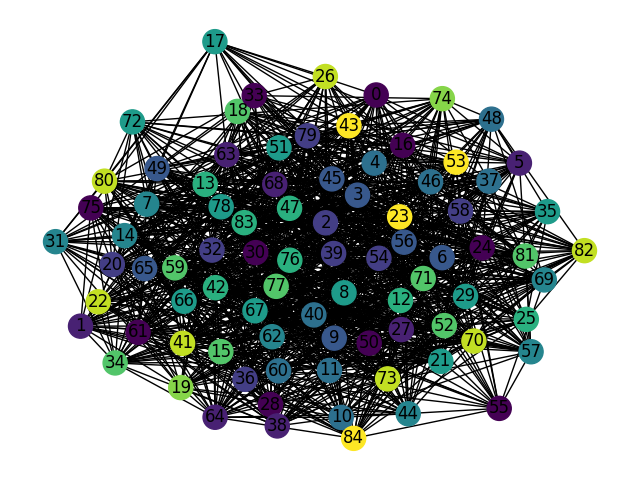

True


In [8]:
misc.draw(iterator.algo.G, iterator.algo.getColoring())
print(misc.verifyColoring(iterator.algo.G, iterator.algo.getColoring()))